### Load neccessary libraries and some charts configuration

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import torch
from torch import nn

import matplotlib.pyplot as plt

from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split

from utils.utils import create_data_loader
from utils.utils import Classifier
from utils.utils import train_epoch, eval_model

import seaborn as sns
import joblib as jbl
from collections import defaultdict
from pathlib import Path

### Create class2index dictionaries for word mapping

In [2]:
classes = ['gender', 'age', 'sign', 'topic']

for class_name in classes:
    
    my_file = Path(f'../data/dictionaries/class2idx_{class_name}.jbl')
    
    if my_file.is_file():
        print(f"Dictionary for class: {class_name} already exists!")
        
    else: # Save if not exists
        df = pd.read_csv(f'../data/training/{class_name}_blog_autorship_clean_sample.csv')
        class2idx_dict = {}
        for idx, val in enumerate(df[class_name].unique()):
            class2idx_dict[val] = idx

        jbl.dump(class2idx_dict, my_file)
        print(f"Dictionary for class: {class_name} saved to file {my_file}")

Dictionary for class: gender already exists!
Dictionary for class: age already exists!
Dictionary for class: sign already exists!
Dictionary for class: topic already exists!


### Define parameters + hyperparameters

In [3]:
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased' # name of the pretrained bert model, I used the lightest pre-trained model availabale with uncasing all words
MAX_LEN = 128 # maximum length of tokens
BATCH_SIZE = 16 # size of the batch to input at once
DROPOUT = 0.5 # how many neural connections we are going to drop randomly to reduce overfitting
EPOCHS = 10 # on how many epochs we are goint to train the models
LEARNING_RATE = 2e-5 # speed of learning of our neural nets
CORRECT_BIAS = False # whether to correct the bias in the neural networks 

# in order to be able to reproduce experiment on any other machine 
RANDOM_SEED = 420

# set device, trained on google colab with use of free GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load BertTokenizer
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

# We should also check here the coverege of the Bert tokenizer over our dataset 

### Training pipeline for all tasks at once

We won't be running the code on our machine, training was already done on Google Colab using free GPU.

As part of the training process we would go through the already trianed models and the results.

### Plots of training history

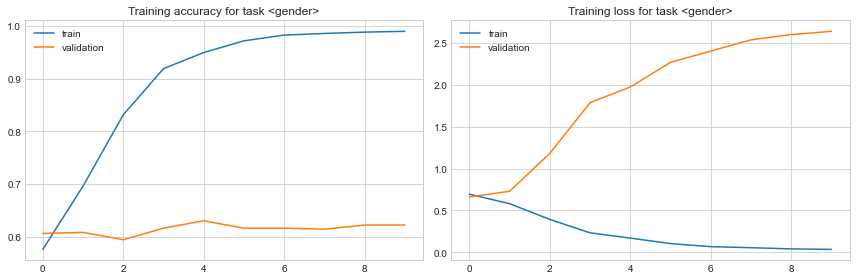

****************************************************************************************************


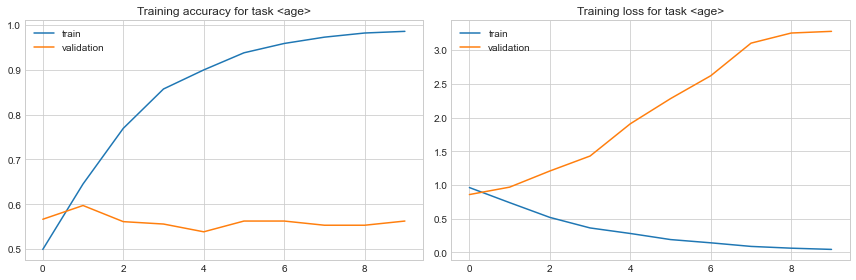

****************************************************************************************************


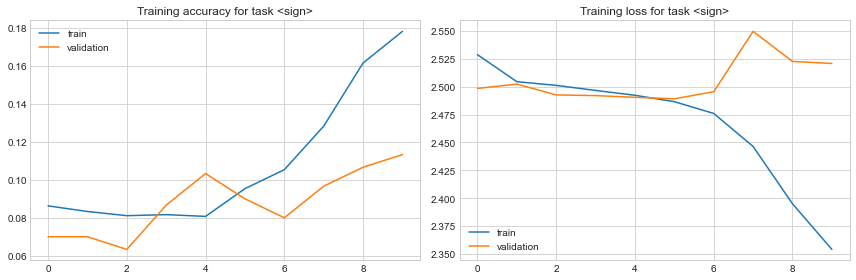

****************************************************************************************************


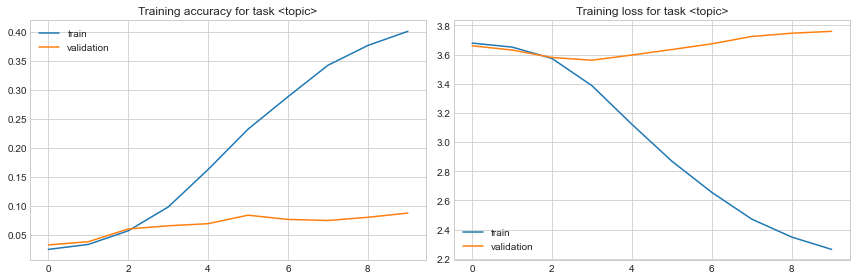

****************************************************************************************************


In [4]:
plt.rcParams["figure.figsize"] = (12,4)

for class_name in classes:
        
    history = jbl.load(f'../models/{class_name}/history.jbl')
    
    plt.subplot(1, 2, 1)
    plt.plot(history['train_acc'], label='train')
    plt.plot(history['val_acc'], label='validation')
    plt.legend()
    plt.title(f"Training accuracy for task <{class_name}>")
    
    plt.subplot(1, 2, 2)
    plt.plot(history['train_loss'], label='train')
    plt.plot(history['val_loss'], label='validation')
    plt.legend()
    plt.title(f"Training loss for task <{class_name}>")
    plt.tight_layout()
    plt.show()    
    
    print("*" * 100)

## Summary

1. As part of speeding up the training process I decided to use small subset of data and train only on 10 epochs:

#### pros
* fast and feasible in such short time

#### cons 
* as we can see our model is overfitting very fast (mostly after 2-3 epochs) - training loss continues to drop and validation loss stays on the same level or even going up
* we are not using the full potential of the data
* we haven't checked any hypothesis
* not tuned any hyperparemeters

2. Apart from overfitting we are getting pretty nice results when it comes to accuracy, however we are not able to compare this results to any other results, should create some experiment at the beggining to have a reference point.
3. We should try to understand the data better, go back to EDA and explore the data a little bit more.